# Prosper Loans Data visulization
## by Salma Gamal
This Dataset includes multiple datapoints for a vast number of variables collected from borrowers concerning their loans, their borrowing history, the lenders and their profit/loss.
In this notebook we explore the main features of some of the included variables visualy, hoping that this will tell an interisting story about the probable patterns and trends in the data.

In [1]:
# importing all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#loading the dataset
df=pd.read_csv('prosperLoanData.csv')

### Exploring main features of the dataset

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#original data shape
df.shape

(113937, 81)

In [5]:
# primary columns to drop
to_drop=['ListingCreationDate', 'ListingNumber', 'ListingKey']

In [6]:
#filtering for only entities after july 2009
df3=df[df.CreditGrade.isnull()]

In [7]:
df3.shape

(84984, 81)

In [8]:
#dropping ID columns
df3=df3.drop(to_drop, axis=1)

In [9]:
#checking for duplicates
df3.duplicated().sum()

0

> Since after dropping the keys there were no duplicates, we proceed to drop the rest of the columns

In [10]:
#list of columns to drop
d2=[ 'ClosedDate', 'BorrowerState', 'Occupation', 'ProsperRating (Alpha)', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'AmountDelinquent', 'PublicRecordsLast12Months','TotalTrades', 'TradesOpenedLast6Months', 'IncomeRange','LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey','MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
'Investors', 'CreditGrade','ProsperScore', 'CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines','TotalCreditLinespast7years', 
     'OpenRevolvingAccounts','TotalInquiries','CurrentDelinquencies','DelinquenciesLast7Years', 'PublicRecordsLast10Years',
       'BankcardUtilization', 'AvailableBankcardCredit','TradesNeverDelinquent (percentage)','ScorexChangeAtTimeOfListing',
       'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','OpenCreditLines','OpenRevolvingMonthlyPayment',
      'InquiriesLast6Months','ListingCategory (numeric)','EmploymentStatusDuration','OnTimeProsperPayments','ProsperPrincipalOutstanding'
       ,'RevolvingCreditBalance']

In [11]:
#dropping columns
df3=df3.drop(d2,axis=1)

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84984 entries, 1 to 113936
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Term                     84984 non-null  int64  
 1   LoanStatus               84984 non-null  object 
 2   BorrowerAPR              84984 non-null  float64
 3   BorrowerRate             84984 non-null  float64
 4   ProsperRating (numeric)  84853 non-null  float64
 5   EmploymentStatus         84984 non-null  object 
 6   IsBorrowerHomeowner      84984 non-null  bool   
 7   DebtToIncomeRatio        77677 non-null  float64
 8   IncomeVerifiable         84984 non-null  bool   
 9   StatedMonthlyIncome      84984 non-null  float64
 10  LoanOriginalAmount       84984 non-null  int64  
dtypes: bool(2), float64(5), int64(2), object(2)
memory usage: 6.6+ MB


In [13]:
df3.LoanStatus.value_counts()

Current                   56576
Completed                 19786
Chargedoff                 5342
Defaulted                  1008
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

> This will be one of the most important catagorical variables in our analysis, to make our visuals more clear, we will summarize all past due loans into one category "Past due".

In [14]:
#Summarizing Loan status

Statusmod=[]
for Status in df3.LoanStatus:
    if (Status not in ['Current', 'Completed', 'Defaulted', 'Chargedoff']):
        Statusmod.append('PastDue')
    else:
        Statusmod.append(Status)
df3['LoanStatus']=Statusmod

In [15]:
df3.EmploymentStatus.value_counts()

Employed         67322
Full-time         8031
Self-employed     4542
Other             3806
Not employed       649
Retired            371
Part-time          263
Name: EmploymentStatus, dtype: int64

In [16]:
#final shape of dataset
df3.shape

(84984, 11)

### The structure of the dataset?

> The original dataset consists of 113937 rows (clients/loans) and 81 columns. After considering the most relavent variables,  we end up 84984 rows and only 11 columns.

### Main features of interest:

> As already mentioned, there are many ways to look at this dataset. My approach is mainly concerned with the status of the loan (if the borrower defaults on the loan or pays back the money on time), factors affecting the borrower's rate and the loan amount.

### Main questions

- What factors affects the outcome of the loan?
- Do different borrowers have different rates?
- Who is more likely to recieve a higher loan rate?
- How to increase the chances of your (large) loan being accepted?


## Univariate Exploration

> Here we invesitigate each variable's distribution to get a better understanding of the main trends.

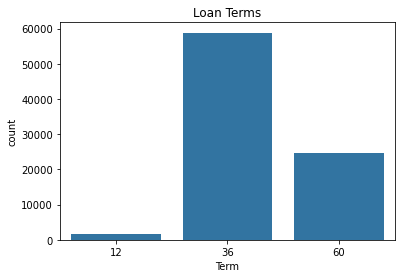

In [17]:
#plot terms distribution
sb.countplot(data=df3, x='Term', color=sb.color_palette()[0]);
plt.title('Loan Terms');

> The term variable seems to only have 3 values as shown above. The most commonly chosen is 36 months, which is reasonable for most people. This reflects the fact that the bank only provides 3 packages or only 3 options for people.

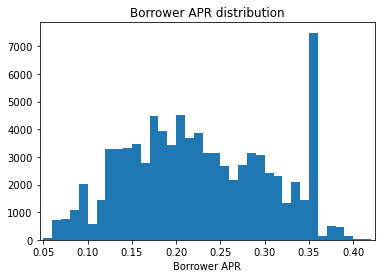

In [18]:
#plot Borrower's APR distribution
plt.hist(df3.BorrowerAPR, bins=np.arange(0,df3.BorrowerAPR.max()+0.01,0.01));
plt.xlim([df3.BorrowerAPR.min(), df3.BorrowerAPR.max()])
plt.xlabel('Borrower APR')
plt.title('Borrower APR distribution');

> There  seems to be a clear mode around 0.35%. Further investigation could clarify why that is.

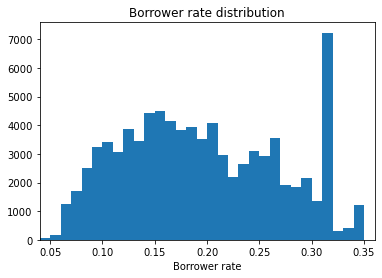

In [19]:
#Plot Borrow rate distribution
plt.hist(df3.BorrowerRate, bins=np.arange(0,df3.BorrowerRate.max()+0.01,0.01));
plt.xlim([df3.BorrowerRate.min(), df3.BorrowerRate.max()])
plt.title('Borrower rate distribution')
plt.xlabel('Borrower rate');

> By definition, APR value is heigher than the borrower's rate. We can also see a clear mode at roughly 0.32%, slightly lower than the APR mode. We can clearly see this from their distribution above. It would be more insightful to look at the difference between the two.

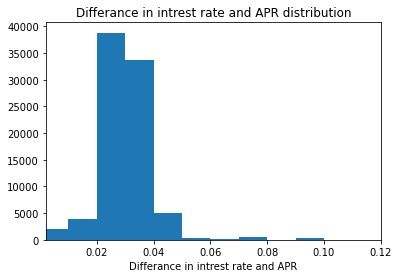

In [20]:
#plot Differance in intrest rate and APR
plt.hist(df3.BorrowerAPR-df3.BorrowerRate, bins=np.arange(0,(df3.BorrowerAPR-df3.BorrowerRate).max()+0.01,0.01) );
plt.xlim([(df3.BorrowerAPR-df3.BorrowerRate).min(), 0.12])
plt.title('Differance in intrest rate and APR distribution')
plt.xlabel('Differance in intrest rate and APR');

> We can see that this differance can get as high as 0.15%, but it is expected that this value lies somewhere between (0.02 and 0.06%). Further analysis will show why this difference may be higher for some people.

In [21]:
# Adding an extra column for further analysis
df3['ExtraIntrest']=df3.BorrowerAPR-df3.BorrowerRate

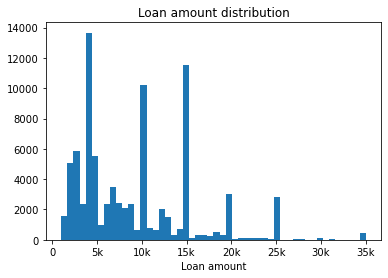

In [22]:
#plot Loan amount distribution
plt.hist(df3.LoanOriginalAmount,bins=50);
plt.title('Loan amount distribution')
plt.xlabel('Loan amount');
plt.xticks([0,5000,10000,15000,20000,25000,30000,35000],['0','5k','10k','15k','20k','25k','30k','35k']);

> Despite loan being a quantitative variable,  the loan amounts seem to have multiple modes (first at roughly 4000 dollars, second at around 8000 dollars and third at about 15000 dollars). This can be explained in more than one way, first, the bank might provide a package for certain amounts that people find convinient. Second, this might be correlated with the type of loan people make, student loan, hospital bill...ect. Though the data was provided in the original dataset, I decided to not take this into consideration following up in this analysis.

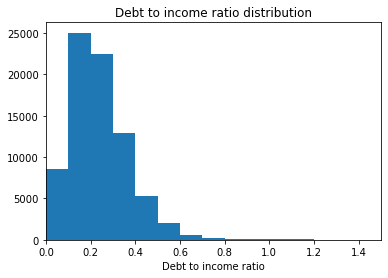

In [23]:
#plot Debt to income ratio distribution
plt.hist(df3.DebtToIncomeRatio, bins=100);
plt.xlim([df3.DebtToIncomeRatio.min(), 1.5 ])
plt.xlabel('Debt to income ratio');
plt.title('Debt to income ratio distribution');

> Most of the borrowers seem to have a low Debt to income ratio, which is  desirable in a borrower to reduce the risk of losing the lent money.

Text(0.5, 1.0, 'Home ownership distribution among borrowers')

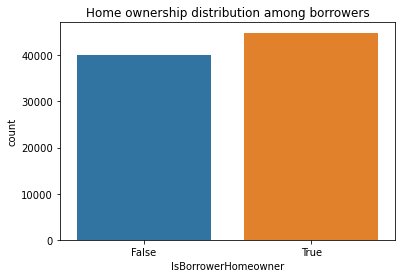

In [24]:
#plot home ownership distribution among borrowers
sb.countplot(data=df3,  x='IsBorrowerHomeowner');
plt.title('Home ownership distribution among borrowers')

> We can see that our sample has more home owners than non home owners but the differance between the 2 is negligable

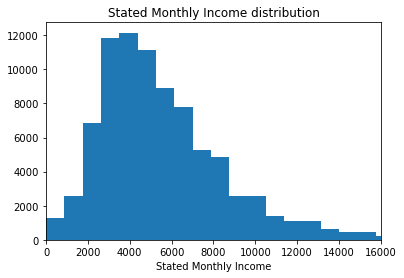

In [25]:
#plot Stated Monthly Income distribution
plt.hist(df3.StatedMonthlyIncome,bins=2000);
plt.xlim([df3.StatedMonthlyIncome.min(), 16000])
plt.xlabel('Stated Monthly Income')
plt.title('Stated Monthly Income distribution');

In [26]:
df3.StatedMonthlyIncome.describe()

count    8.498400e+04
mean     5.929911e+03
std      8.234505e+03
min      0.000000e+00
25%      3.433333e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

> We can see that most incomes lie between 3000 and 7000 dollars but there is  a wide range of incomes up to 17000 dollars. The distribution is skewed to the right which reflects that more people with lower incomes apply for loans, which is to be expected.

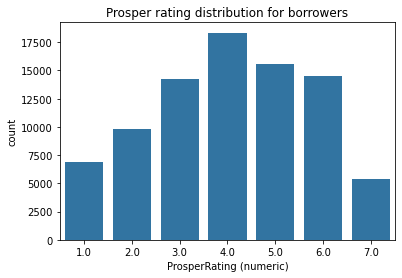

In [27]:
#plot Prosper rating distribution for borrowers
sb.countplot(data=df3,x='ProsperRating (numeric)', color=sb.color_palette()[0]);
plt.title('Prosper rating distribution for borrowers');


> As shown in this figure, we can see most borrowers have an average prosper rating, yet there is a non-trivial number of people with low (1 and 2) rating.

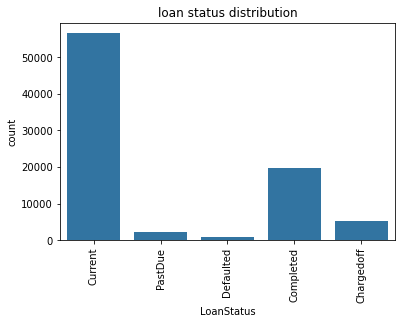

In [28]:
#plot loan status distribution
sb.countplot(data=df3, x='LoanStatus',color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.title('loan status distribution');

> We can see most loan are current loans (at the time the data was collected). We will later be looking at how other variables affect this outcome.

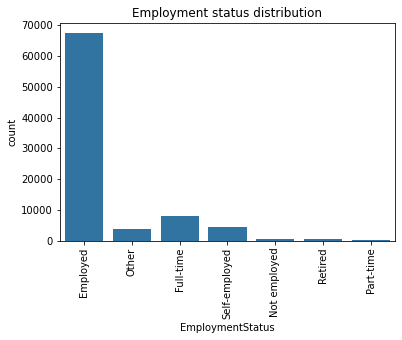

In [29]:
#plot Employment status distribution
sb.countplot(data=df3, x='EmploymentStatus',color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.title('Employment status distribution');

> As expected, most borrowers are employed. It would be highly risky to  give a loan to someone who doesn't have a source of income. The relatively small number of unemployed borrowers, or  other work status makes it hard to draw clear conclusions using this variable in further analysis.

## Bivariate Exploration

> Looking at how two variables affect one another can provide great insight into the trends in the data. Here we take a deeper look on how/if variables are related, and what we can learn from these trends.

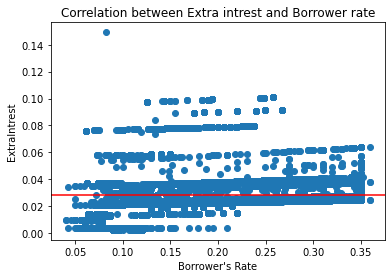

In [30]:
#plot correlation between Extra intrest and Borrower rate
m=df3.ExtraIntrest.median()
plt.scatter(data=df3, x='BorrowerRate', y='ExtraIntrest');
plt.axhline(y = m, color = 'r', linestyle = '-')
plt.xlabel("Borrower's Rate");
plt.ylabel('ExtraIntrest');
plt.title('Correlation between Extra intrest and Borrower rate');

> The above figure shows that the intrest added to the original borrower's rate doesn't seem to be correlated to the original rate value. 

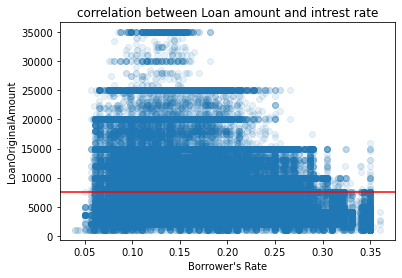

In [31]:
#plot correlation between Loan amount and intrest rate
m=df3.LoanOriginalAmount.median()
plt.scatter(data=df3, y='LoanOriginalAmount', x='BorrowerRate', alpha=0.1);
plt.axhline(y = m, color = 'r', linestyle = '-')
plt.xlabel("Borrower's Rate")
plt.ylabel('LoanOriginalAmount');
plt.title('correlation between Loan amount and intrest rate');

> This figure shows an interisting insight, as the loan's amount gets higher, it seems that the rate range is lower.In other words, people with loans under 10,000 dollars can expect their interest to go up to 0.35%, while people with loans over 30,000 dollars can expect their rate to be lower than 0.2%. There are other factors that can affect this distribution, like borrower's credability and loan term. We will be looking at this later.

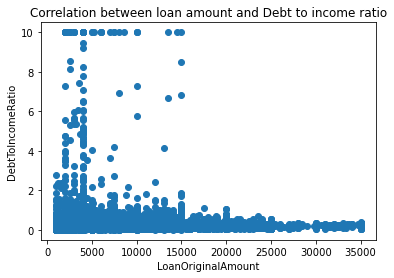

In [32]:
#plot correlation between loan amount and Debt to income ratio
plt.scatter(data=df3, x='LoanOriginalAmount', y='DebtToIncomeRatio');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('DebtToIncomeRatio');
plt.title('Correlation between loan amount and Debt to income ratio');

> It is clear in the previous plot that higher debt to income ratio limits the loan amount you would be allowed to have.

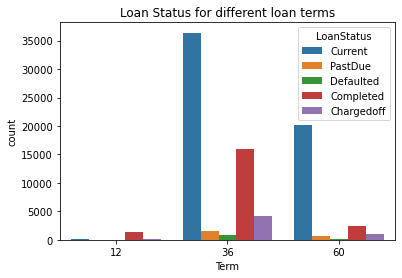

In [33]:
#Plot Loan Status for different loan terms
sb.countplot(data=df3, x='Term', hue='LoanStatus');
plt.title('Loan Status for different loan terms');

> As we can see, most current loans are in the 36 months term range. This agrees with our previous finding, since most people take loans in this term range.

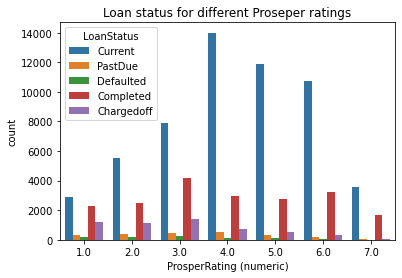

In [34]:
#plot Loan status for different Proseper ratings
sb.countplot(data=df3, x='ProsperRating (numeric)', hue='LoanStatus');
plt.title('Loan status for different Proseper ratings');

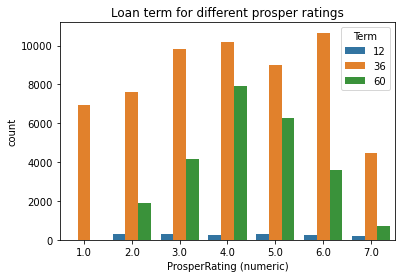

In [35]:
#plot Loan term for different prosper ratings
sb.countplot(data=df3, x='ProsperRating (numeric)', hue='Term');
plt.title('Loan term for different prosper ratings');

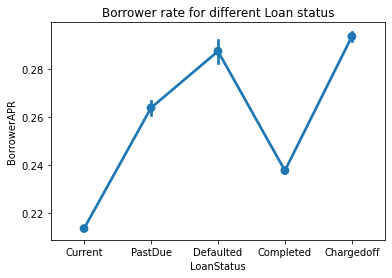

In [36]:
#Plot Borrower rate for different Loan status
sb.pointplot(data=df3, x='LoanStatus', y='BorrowerAPR');
plt.title('Borrower rate for different Loan status');

> Here we can see a very interisting fact. It seems that defaulted, chargedoff and pastdue loans have on average a higher intrest rate than current and completed loans.

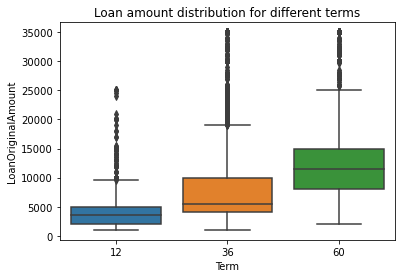

In [37]:
#plot Loan amount distribution for different terms
sb.boxplot(data=df3, x='Term', y='LoanOriginalAmount')
plt.title('Loan amount distribution for different terms');

> The one clear trend here is that higher loans tend to have a higher loan term, which agrees with our intuition. We also note that there are no loans above 25000 dolars that have a 12 month loan term. We will be looking at this distributoin in more details later.

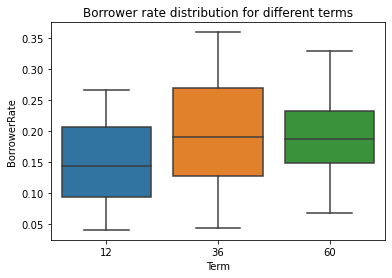

In [38]:
# plot Borrower rate distribution for different terms
sb.boxplot(data=df3, x='Term', y='BorrowerRate');
plt.title('Borrower rate distribution for different terms');

> This plot shows an unexpected pattern. We see here that for the 12 months term, people tend to have the lowest rates. In the 36 months term (the most common term), the rate variation is much larger. 

## Multivariate Exploration

> Looking at more than two variablels can help us understand the story data is telling more clearly. Here we look at the variables of intrest and their relation.

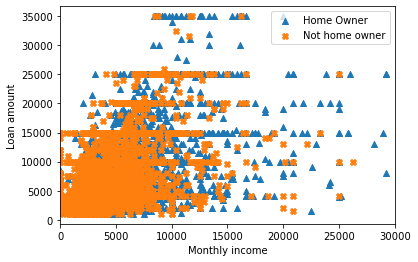

In [39]:
#plot Loan amount correlation with monthly income for home owners and non home owners
markers = [[True, '^'],
               [False, 'X']]

np.random.seed(42)
for cat, marker in markers:
    df_cat =df3[df3['IsBorrowerHomeowner'] == cat]
    df_cats=df_cat.sample(3000)
    plt.scatter(data = df_cats, y = 'LoanOriginalAmount', x = 'StatedMonthlyIncome', marker = marker)
plt.legend(['Home Owner','Not home owner'])
plt.xlim([0,30000])
plt.xlabel('Monthly income')
plt.ylabel('Loan amount');

> We recall from univariate analysis that the number of people who own homes and those who didn't in our dataset was roughly equal. We can also see here that there doesn't seem to be any colleration to the monthly income or loan amount. No clear trends.

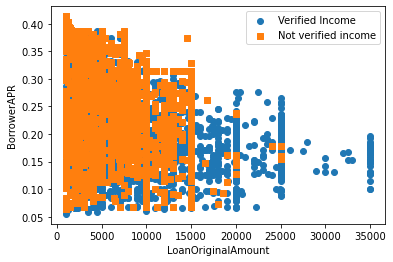

In [40]:
#plot Borrower's rate correlation with loan amount for verified vs non verified income
markers = [[True, 'o'],
               [False, 's']]

np.random.seed(42)
for cat, marker in markers:
    df_cat =df3[df3['IncomeVerifiable'] == cat]
    df_cats=df_cat.sample(5000)
    plt.scatter(data = df_cats, x = 'LoanOriginalAmount', y = 'BorrowerAPR', marker = marker)
plt.legend(['Verified Income','Not verified income'])
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

> We can see a clear trend for higher loan amounts where the income is verified. This suggests that the verification was one of the conditions on accepting the loan with higher values. We also note that the higher income APR is for the lowest loans.

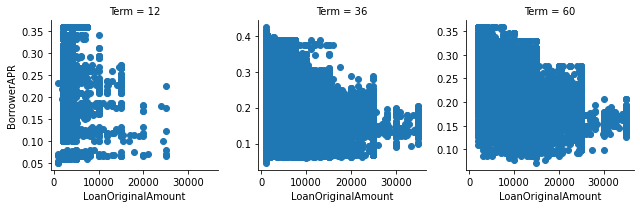

In [49]:
#plot borrower's rate correlation with loan amount for different terms
f = sb.FacetGrid(data = df3, col = 'Term', col_wrap=3, sharey=False)
f.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR');

> The first thing we notice here is that almost no loans higher than 30,000 dollars have a 12 months term, which is reasonable. We also notice  that borrower's APR range is higher in the 36 months term. We remember from our univariate analysis that this was the most common term chosen. This agrees with our bivariate analysis.

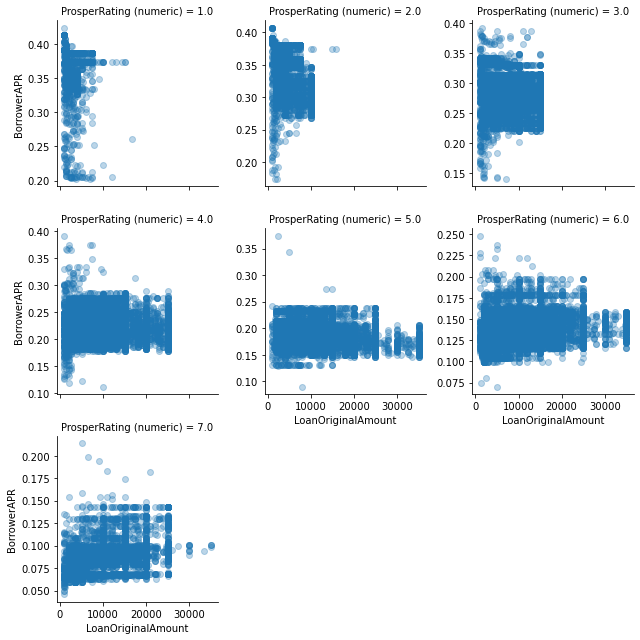

In [50]:
#Plot Borrower rate correlation with loan amount for different prosper rating
f = sb.FacetGrid(data = df3, col = 'ProsperRating (numeric)', col_wrap=3, sharey=False)
f.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha=0.3);

C:\Users\En.Gm\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


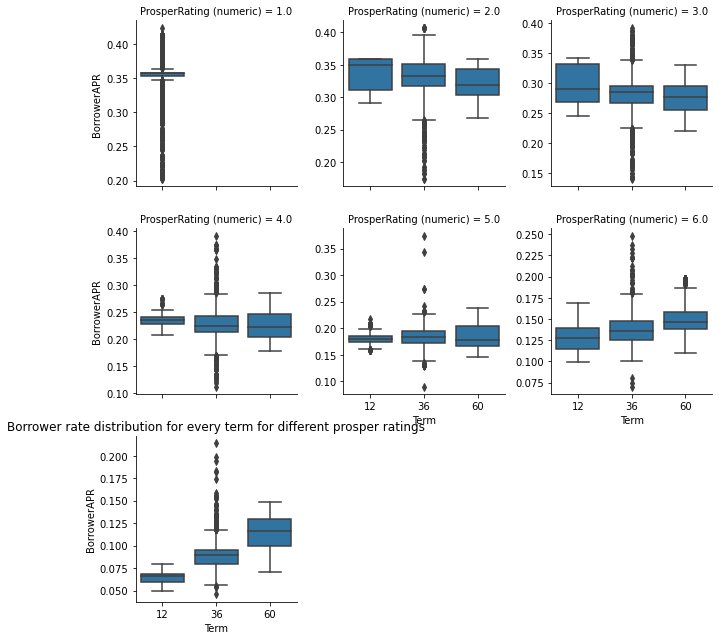

In [43]:
#plot borrower rate distribution for every term for different prosper ratings
f = sb.FacetGrid(data = df3, col = 'ProsperRating (numeric)', col_wrap=3, sharey=False)
f.map(sb.boxplot, 'Term', 'BorrowerAPR');
plt.title('Borrower rate distribution for every term for different prosper ratings');

> There are multiple insights to draw from this plot. First we note that the lowest rating (1) seems to have high APR rate and only one available loan term. The low rating high loan rate trend is also very clear in this plot. 

These plots verify our intuition. People with highest risks (lowest ranking) are granted the highest APR values and also lower loans. This explains the trend of low loans and high intrest rates observed earlier. We can also see that as a borrower's rating gets better, their APR gets lower and they are allowed higher loan amounts.

C:\Users\En.Gm\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


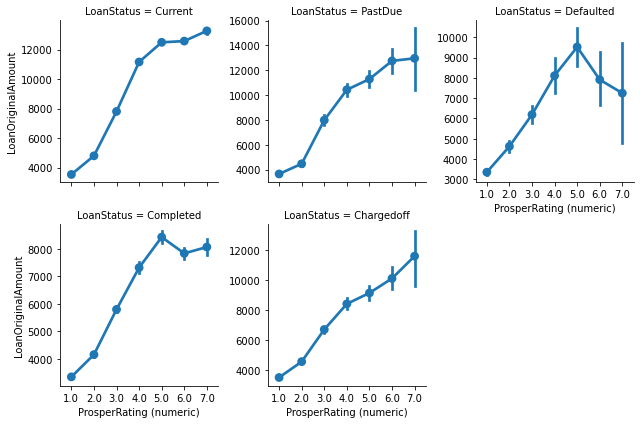

In [44]:
#plot Loan amount distribution for prosper ratings for different loan status
f = sb.FacetGrid(data = df3, col = 'LoanStatus', col_wrap=3, sharey=False)
f.map(sb.pointplot, 'ProsperRating (numeric)', 'LoanOriginalAmount');

> Here we note that higher loan amounts are given to people with higher rating, and that most  of these loans are current loans.